In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score as acc

# EDA

In [3]:
#importing train and test dataframes and merging all
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df = pd.concat((df_train, df_test), axis=0)

In [4]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [7]:
#columns to drop:
cols_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']

In [8]:
df.drop(cols_drop, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1046 non-null float64
Embarked    1307 non-null object
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [9]:
df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


In [10]:
pd.value_counts(df['Parch'])

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [11]:
pd.value_counts(df['SibSp'])

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [12]:
pd.value_counts(df['Embarked'])

S    914
C    270
Q    123
Name: Embarked, dtype: int64

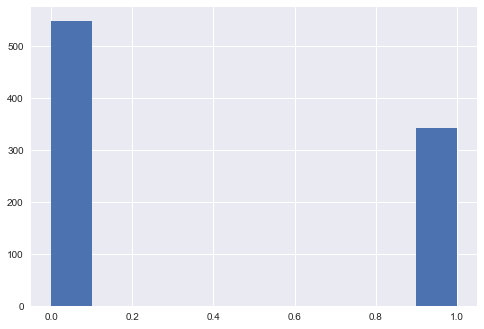

In [13]:
plt.hist(df_train['Survived'])
plt.show()

In [14]:
cols_drop = ['Parch']
df.drop(cols_drop, axis=1, inplace=True)

In [15]:
df.groupby('Survived', as_index=False)['Sex'].describe()

,count,unique,top,freq
0,549,2,male,468
1,342,2,female,233


In [16]:
df.groupby('Survived', as_index=False)['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [17]:
df.groupby('Survived', as_index=False)['Embarked'].describe()

,count,unique,top,freq
0,549,3,S,427
1,340,3,S,217


In [18]:
df.groupby('Survived', as_index=False)['Pclass'].describe()

,count,mean,std,min,25%,50%,75%,max
0,549.0,2.531876,0.735805,1.0,2.0,3.0,3.0,3.0
1,342.0,1.950292,0.863321,1.0,1.0,2.0,3.0,3.0


In [19]:
df = pd.get_dummies(df, columns=['Sex'])
df = pd.get_dummies(df, columns=['Embarked'])

In [20]:
df.describe()

,Age,Fare,Pclass,SibSp,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1046.000000,1308.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,2.294882,0.498854,0.383838,0.355997,0.644003,0.206264,0.093965,0.698243
std,14.413493,51.758668,0.837836,1.041658,0.486592,0.478997,0.478997,0.404777,0.291891,0.459196
min,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,39.000000,31.275000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,512.329200,3.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
for i in range(len(df.columns)):
    if df.iloc[:, i].isnull().any().any() and i!=4:
        df.iloc[:, i].fillna(df.iloc[:, i].mean(), inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
Pclass        1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
Sex_female    1309 non-null uint8
Sex_male      1309 non-null uint8
Embarked_C    1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
dtypes: float64(3), int64(2), uint8(5)
memory usage: 67.8 KB


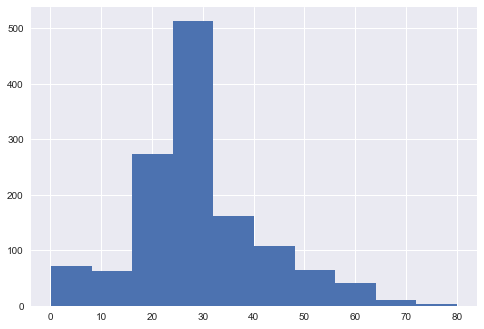

In [23]:
plt.hist(df['Age'])
plt.show()

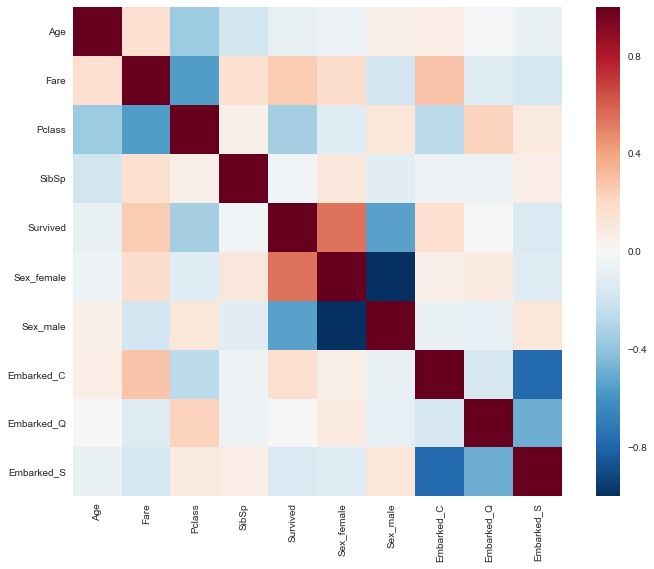

In [24]:
#correlation matrix:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
sns.plt.show()

In [25]:
df.head()

,Age,Fare,Pclass,SibSp,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,3,1,0.0,0,1,0,0,1
1,38.0,71.2833,1,1,1.0,1,0,1,0,0
2,26.0,7.9250,3,0,1.0,1,0,0,0,1
3,35.0,53.1000,1,1,1.0,1,0,0,0,1
4,35.0,8.0500,3,0,0.0,0,1,0,0,1


In [26]:
cols_drop = ['Age', 'SibSp', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare']
df.drop('Age', axis=1, inplace=True)
train = df.iloc[0:len(df_train),:]
train_target = train.pop('Survived')
test = df.iloc[len(df_train):,:].drop(['Survived'], axis=1)

In [27]:
test = test.as_matrix()
train = train.as_matrix()
train_target = np.reshape(train_target.as_matrix(), (len(train_target) ,1))

In [28]:
#normalizing the train data:
for i in range(train.shape[1]):
    if max(train[:, i]) != 0:
        train[:, i] = train[:, i] / max(train[:, i])
        
#normalizing the test data:
for i in range(test.shape[1]):
    if max(test[:, i]) != 0:
        test[:, i] = test[:, i] / max(test[:, i])     


# XGBoost

In [29]:
# A parameter grid for XGBoost
#train = preprocessing.normalize(train, norm='l2')
#test = preprocessing.normalize(test, norm='l2')
train_target = np.reshape(train_target, (len(train_target, )))
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 9]
        }

xgb_model = xgb.XGBClassifier()
Predictor = GridSearchCV(xgb_model, params, scoring = 'accuracy')
Predictor.fit(train, train_target)
best_params = Predictor.best_params_
print('best parameters:', best_params)

In [30]:
result_df = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, "Survived":Predictor.predict(test)})
result_df.to_csv("xgb_6.csv", index=False)

In [31]:
res_train = Predictor.predict(train)
print('acc is:', acc(y_pred=res_train, y_true=train_target))